In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import files

uploaded = files.upload()

Saving BINANCE_BTCUSDT, 1D.csv to BINANCE_BTCUSDT, 1D (1).csv


In [3]:
data = pd.read_csv('BINANCE_BTCUSDT, 1D.csv', date_parser = True)
len(data)

1561

In [4]:
data_training = data[data['time']< '2021-09-01'].copy()
len(data_training)

1476

In [5]:
data_test = data[data['time']> '2021-09-01'].copy()
len(data_test)


85

In [65]:
len(data_test2)

85

In [5]:
data_test.head()

,time,open,high,low,close
1476,2021-09-01T00:00:00Z,47100.89,49156.00,46512.00,48810.52
1477,2021-09-02T00:00:00Z,48810.51,50450.13,48584.06,49246.64
1478,2021-09-03T00:00:00Z,49246.63,51000.00,48316.84,49999.14
1479,2021-09-04T00:00:00Z,49998.00,50535.69,49370.00,49915.64
1480,2021-09-05T00:00:00Z,49917.54,51900.00,49450.00,51756.88


In [6]:
 training_data = data_training.drop(['time'], axis = 1)
 training_data.head()

,open,high,low,close
0,4261.48,4485.39,4200.74,4285.08
1,4285.08,4371.52,3938.77,4108.37
2,4108.37,4184.69,3850.00,4139.98
3,4120.98,4211.08,4032.62,4086.29
4,4069.13,4119.62,3911.79,4016.00


In [7]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.01777651, 0.01963201, 0.0233728 , 0.0181509 ],
       [0.01816732, 0.01778279, 0.01894786, 0.01522456],
       [0.01524103, 0.01474873, 0.01744844, 0.01574803],
       ...,
       [0.75690695, 0.7528037 , 0.75917673, 0.75479126],
       [0.7547954 , 0.74072689, 0.74381366, 0.72523274],
       [0.72523722, 0.73029288, 0.74122933, 0.72718651]])

In [8]:
scaler.scale_

array([1.65598556e-05, 1.62396979e-05, 1.68910359e-05, 1.65601353e-05])

In [9]:
X_train = [] 
Y_train = []
for i in range(60, training_data.shape[0]):
    
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

    

In [ ]:
training_data.shape

(1476, 4)

In [ ]:
X_train.shape

(1416, 60, 4)

In [ ]:
Y_train.shape

(1416,)

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [11]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 4)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units =4))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11000     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [12]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history= model.fit(X_train, Y_train, epochs = 50, batch_size =50, validation_split=0.1)


Epoch 1/10
26/26 [==============================] - 13s 247ms/step - loss: 0.0358 - val_loss: 0.2818
Epoch 2/10
26/26 [==============================] - 6s 240ms/step - loss: 0.0225 - val_loss: 10.0429
Epoch 3/10
26/26 [==============================] - 11s 431ms/step - loss: 0.0650 - val_loss: 0.3436
Epoch 4/10
26/26 [==============================] - 11s 415ms/step - loss: 0.0316 - val_loss: 0.0409
Epoch 5/10
26/26 [==============================] - 6s 231ms/step - loss: 0.0275 - val_loss: 0.2282
Epoch 6/10
26/26 [==============================] - 6s 219ms/step - loss: 0.0189 - val_loss: 0.0279
Epoch 7/10
26/26 [==============================] - 6s 219ms/step - loss: 0.0049 - val_loss: 0.0291
Epoch 8/10
26/26 [==============================] - 6s 218ms/step - loss: 0.0048 - val_loss: 0.0216
Epoch 9/10
26/26 [==============================] - 6s 220ms/step - loss: 0.0040 - val_loss: 0.0116
Epoch 10/10
26/26 [==============================] - 6s 220ms/step - loss: 0.0037 - val_loss: 0.

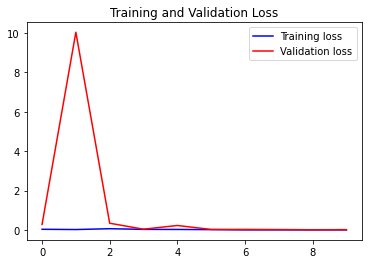

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [14]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['time'], axis = 1)
df.head()

,open,high,low,close
0,33786.54,34945.61,33316.73,34669.13
1,34669.12,35967.85,34357.15,35286.51
2,35288.13,35293.78,33125.55,33690.14
3,33690.15,35118.88,33532.00,34220.01
4,34220.02,35059.09,33777.77,33862.12


In [15]:
inputs = scaler.transform(df)

In [16]:
scale0 = 1/scaler.scale_[0]
scale1 = 1/scaler.scale_[1]
scale2 = 1/scaler.scale_[2]
scale3 = 1/scaler.scale_[3]

In [17]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
        X_test.append(inputs[i-60:i])
        Y_test.append(inputs[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test)
Y_test = Y_test*scale3 

In [18]:
from sklearn.metrics import mean_absolute_percentage_error

In [1]:
def forecast_for_days(days):  #Number of days of prediction
  
  X_test2=np.zeros((85,60,4))
  for i in range(0,85,days): #days is prediction of how many days you want
    X_test2[i,:,:]=X_test[i,:,:].copy() #first true

  compare_array=np.zeros((60,4)) 
  for i in range(0,85):
    if np.array_equal(X_test2[i,:,:],compare_array) is True:
      a=X_test2[i-1,:,:].reshape(1,60,4)
      temp=model.predict(a)
      b=np.concatenate((X_test2[i-1,1:,:], temp))
      X_test2[i,:,:]=b  

  Y_pred = model.predict(X_test2)

  Y_pred[:,0] = Y_pred[:,0]*scale0
  Y_pred[:,1] = Y_pred[:,1]*scale1
  Y_pred[:,2] = Y_pred[:,2]*scale2
  Y_pred[:,3] = Y_pred[:,3]*scale3

  return Y_pred,days


In [60]:
prediction,days = forecast_for_days(5)

In [ ]:
print("prediction for",days,"days")
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'blue', label = 'Real Bitcoin Price')
plt.plot(prediction[:,3], color = 'green', label = 'Predicted Bitcoin Price')
temp_x=np.arange(0,len(prediction[:,3]),days)
plt.plot(temp_x,prediction[:,3][0::days],'o',color='r')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

print("MAPE: ", mean_absolute_percentage_error(prediction[:,3],Y_test))